# **Spotify Tracks Dataset - Exploratory Data Analysis (EDA)**

## **Introduction**
This project aims to analyze a dataset of **Spotify tracks** spanning **125 different genres**. Each track contains **audio features** such as **danceability, energy, tempo, loudness**, and **popularity metrics** that help describe its musical characteristics.

The analysis focuses on identifying patterns and trends in the data to answer key questions such as:
- How do audio features like **danceability and energy** vary across genres?
- What are the **most popular genres and artists** in the dataset?
- How does **popularity correlate with track features** such as loudness or tempo?
- Are there noticeable trends in **explicit content** across different genres?

## **Dataset**

### **About the Dataset**
- **Overview**:  
  This dataset consists of **Spotify music tracks** along with metadata such as **artist names, album details, popularity, and various audio features**. The tracks belong to **125 different genres** and provide insights into music trends.
  
- **Source**:  
  Extracted from Spotify’s API and aggregated into a structured CSV format.

- **Rows**: Approximately **500,000 records** (varies based on data source).  
- **Columns**:  
  | Column          | Description                                                    |  
  |----------------|----------------------------------------------------------------|  
  | `track_id`     | Unique Spotify ID for the track                                |  
  | `artists`      | Name(s) of the artist(s) performing the track                  |  
  | `album_name`   | Name of the album in which the track appears                   |  
  | `track_name`   | Title of the track                                             |  
  | `popularity`   | Popularity score (0-100), based on streaming trends            |  
  | `duration_ms`  | Length of the track in milliseconds                            |  
  | `explicit`     | Boolean value indicating explicit content (`True`/`False`)     |  
  | `danceability` | Measure of how suitable the track is for dancing (0-1)        |  
  | `energy`       | Measure of track intensity and activity (0-1)                  |  
  | `key`          | The key the track is in (e.g., 0 = C, 1 = C♯/D♭, etc.)         |  
  | `loudness`     | The overall loudness of a track in decibels (dB)               |  
  | `mode`         | Indicates whether the track is in a major (1) or minor (0) key |  
  | `speechiness`  | Measures presence of spoken words in the track (0-1)          |  
  | `acousticness` | Confidence measure of whether the track is acoustic (0-1)     |  
  | `instrumentalness` | Likelihood of the track being purely instrumental (0-1)   |  
  | `liveness`     | Detects presence of an audience in the recording (0-1)        |  
  | `valence`      | Musical positiveness of the track (0-1)                        |  
  | `tempo`        | Estimated tempo of the track in beats per minute (BPM)        |  
  | `time_signature` | Time signature of the track (e.g., 3/4, 4/4, etc.)          |  
  | `track_genre`  | Genre classification of the track                             |  

### **Criteria for Analysis**
- A track’s **popularity** is measured on a scale from **0 to 100**, with **higher values indicating more streams**.
- **Audio features** such as **danceability, energy, valence**, and **acousticness** are used to explore musical characteristics.
- **Genre-based comparisons** will help identify key differences in track features.

## **Exploratory Data Analysis (EDA)**

### **Tools Used**
- **Python**: For data processing and analysis.  
- **Polars**: A high-performance data manipulation library.  
- **Tableau**: For creating interactive visualizations.  
- **Matplotlib**: For creating static visualizations.  
- **Seaborn**: For statistical data visualization.  
- **Pandas**: For structured data manipulation.  
- **psycopg2**: For connecting to PostgreSQL and loading transformed data.  
- **PostgreSQL**: Chosen database for storing structured data.  
- **scikit-learn (sklearn)**: For clustering (K-Means), PCA, and predictive modeling.  
- **statsmodels**: For statistical analysis and time series trends.  
- **scipy**: For hypothesis testing and statistical comparisons.  
- **plotly**: For interactive visualizations in dashboards.  

- **Jupyter Notebook**: For documenting and executing code.

# **EDA Plan**

### **1. Dataset Description**
- **General Structure**: Review dataset dimensions and column data types.
- **Preview of Data**: Inspect a subset of records.
- **Initial Quality Check**: Assess missing values and duplicate records.

### **2. Descriptive Statistics**
- **Numerical Variables**: Analyze summary statistics for numerical attributes.
- **Categorical Variables**: Count occurrences of artists, genres, and track features.
- **Summary of Anomalies**: Identify inconsistencies or unusual values.

### **3. Distribution Analysis**
- **Popularity Distribution**: Examine the distribution of track popularity scores.
- **Duration & Tempo**: Analyze trends in track length and beats per minute (BPM).
- **Danceability & Energy Levels**: Compare how genres differ in energy and rhythm.
- **Speechiness, Acousticness & Instrumentalness**: Identify characteristics of spoken vs. instrumental tracks.

### **4. Data Cleaning**
- **Handling Missing Values**: Address gaps in track metadata and audio features.
- **Duplicate Removal**: Detect and remove redundant records.
- **Standardization & Normalization**: Ensure consistency in numerical and categorical data.

### **5. Relationships Between Variables**
- **Audio Feature Correlations**: Analyze relationships between tempo, energy, and danceability.
- **Popularity vs. Track Features**: Determine how musical characteristics influence popularity.
- **Genre-Based Trends**: Compare track features across different music genres.

### **6. Advanced Analysis**
- **Genre Clustering**: Identify patterns in music genres based on audio features.
- **Popularity Prediction**: Use machine learning to predict track popularity.

### **7. Data Visualization Strategy**
- **Key Charts**: Use bar charts, scatter plots, and heatmaps for analysis.
- **Dashboard Insights**: Create interactive visualizations to showcase key findings.

### **8. Conclusion**
- Summarize insights from the EDA.
- Highlight trends in audio features, genre characteristics, and popularity.
- Identify areas for further exploration in music analytics.

## **Final Objective**
The primary goal of this project is to analyze **Spotify track data** to derive meaningful insights into **music trends, popularity factors, and genre-based differences**. This exercise simulates real-world **data engineering and analytics tasks**, providing hands-on experience in **data transformation, feature extraction, and visualization**.

As part of this project, we will:
1. **Clean and Structure the Data**: Handle missing values, ensure data integrity, and standardize formats.
2. **Perform EDA**: Explore trends, patterns, and key insights within the dataset.
3. **Analyze Audio Features**: Understand how different musical features contribute to popularity.
4. **Create Visualizations**: Develop charts and dashboards to communicate key findings effectively.


In [2]:
import polars as pl 
import matplotlib.pyplot as plt
import seaborn as sns

spotify_df = pl.read_csv("../data/raw/spotify_dataset.csv")
spotify_df.head()

shape: (5, 21)
┌─────┬─────────────┬─────────────┬─────────────┬───┬─────────┬─────────┬─────────────┬────────────┐
│     ┆ track_id    ┆ artists     ┆ album_name  ┆ … ┆ valence ┆ tempo   ┆ time_signat ┆ track_genr │
│ --- ┆ ---         ┆ ---         ┆ ---         ┆   ┆ ---     ┆ ---     ┆ ure         ┆ e          │
│ i64 ┆ str         ┆ str         ┆ str         ┆   ┆ f64     ┆ f64     ┆ ---         ┆ ---        │
│     ┆             ┆             ┆             ┆   ┆         ┆         ┆ i64         ┆ str        │
╞═════╪═════════════╪═════════════╪═════════════╪═══╪═════════╪═════════╪═════════════╪════════════╡
│ 0   ┆ 5SuOikwiRyP ┆ Gen Hoshino ┆ Comedy      ┆ … ┆ 0.715   ┆ 87.917  ┆ 4           ┆ acoustic   │
│     ┆ MVoIQDJUgSV ┆             ┆             ┆   ┆         ┆         ┆             ┆            │
│ 1   ┆ 4qPNDBW1i3p ┆ Ben         ┆ Ghost       ┆ … ┆ 0.267   ┆ 77.489  ┆ 4           ┆ acoustic   │
│     ┆ 13qLCt0Ki3A ┆ Woodward    ┆ (Acoustic)  ┆   ┆         ┆         ┆             ┆            │
│ 2   ┆ 1iJBSr7s7jY ┆ Ingrid Mich ┆ To Begin    ┆ … ┆ 0.12    ┆ 76.332  ┆ 4           ┆ acoustic   │
│     ┆ XzM8EGcbK5b ┆ aelson;ZAYN ┆ Again       ┆   ┆         ┆         ┆             ┆            │
│ 3   ┆ 6lfxq3CG4xt ┆ Kina        ┆ Crazy Rich  ┆ … ┆ 0.143   ┆ 181.74  ┆ 3           ┆ acoustic   │
│     ┆ TiEg7opyCyx ┆ Grannis     ┆ Asians      ┆   ┆         ┆         ┆             ┆            │
│     ┆             ┆             ┆ (Original   ┆   ┆         ┆         ┆             ┆            │
│     ┆             ┆             ┆ Mo…         ┆   ┆         ┆         ┆             ┆            │
│ 4   ┆ 5vjLSffimiI ┆ Chord       ┆ Hold On     ┆ … ┆ 0.167   ┆ 119.949 ┆ 4           ┆ acoustic   │
│     ┆ P26QG5WcN2K ┆ Overstreet  ┆             ┆   ┆         ┆         ┆             ┆            │
└─────┴─────────────┴─────────────┴─────────────┴───┴─────────┴─────────┴─────────────┴────────────┘

## **1. Dataset Description**

#### Overview:
To perform a meaningful exploratory data analysis, it's essential to understand the structure of the dataset. This includes knowing how many records it contains, the types of variables available, and the presence of categorical vs. numerical features.

In this step, we begin by loading the dataset and reviewing:

In [1]:
categorical_columns = ["track_id", "artists", "album_name", "track_name", "track_genre"]

print("Dataset Information:")
print("Number of Rows:", spotify_df.shape[0])
print("Number of Columns:", spotify_df.shape[1])
print("\nColumn Names and Data Types:")
print(spotify_df.schema)


Dataset Information:


NameError: name 'spotify_df' is not defined

#### Key Observations

- The dataset contains **114,000 tracks** and **21 features**.
- Among these, key identifiers and text-based variables like `track_id`, `artists`, `album_name`, `track_name`, and `track_genre` are **categorical** in nature.
- Several numerical audio features are present, including:
  - **Popularity** (int)
  - **Duration (ms)**, **Tempo (BPM)**, **Loudness (dB)** (float/int)
  - **Musical features** like *danceability*, *energy*, *valence*, *speechiness*, *acousticness*, and *instrumentalness* are all measured on a scale from 0 to 1.
- There is also an **explicit** flag (boolean) and music theory attributes such as **key**, **mode**, and **time_signature**.
- No column has missing names or unknown types, which means the schema is well-formed and ready for analysis.

### Unique Values in Categorical Columns

#### Overview: Context and Why I'm Doing It

Understanding the number of unique values in key categorical features helps assess the dataset’s variety and detect potential redundancies or repetitions. It also informs how we might group or aggregate data for downstream analysis.


In [ ]:
unique_values = {
    column: spotify_df[column].n_unique() for column in categorical_columns
}

print("\nUnique Values per Categorical Column:")
for column, count in unique_values.items():
    print(f"{column}: {count} unique values")



Unique Values per Categorical Column:
track_id: 89741 unique values
artists: 31438 unique values
album_name: 46590 unique values
track_name: 73609 unique values
track_genre: 114 unique values


#### Key Observations

- `track_id`: 89,741 unique → fewer than total rows; possible duplicate entries or reused IDs.
- `artists`: 31,438 unique → high artist diversity, good for artist-level aggregation.
- `album_name`: 46,590 unique → indicates broad album coverage, possibly over many years.
- `track_name`: 73,609 unique → common track names likely reused across artists.
- `track_genre`: 114 unique → confirms genre richness, enabling meaningful comparisons.

The difference between unique `track_id` and total rows (114,000) suggests that multiple rows may correspond to the same track, perhaps with different metadata or genre tagging.

### Numerical Columns Identified for Analysis

#### Overview

We isolate all numerical variables to understand their central tendencies, dispersion, and ranges. This provides insight into scale differences and outliers, and guides normalization or transformation needs in future steps.

In [ ]:
num_cols= [col for col in spotify_df.columns if spotify_df[col].dtype in [pl.Int64, pl.Float64]]
df_numeric_stats = spotify_df.select(num_cols).describe()

print("\nNumerical Columns Identified for Analysis:")
print(df_numeric_stats)



Numerical Columns Identified for Analysis:
shape: (9, 16)
┌────────────┬───────────┬───────────┬───────────┬───┬──────────┬──────────┬───────────┬───────────┐
│ statistic  ┆           ┆ popularit ┆ duration_ ┆ … ┆ liveness ┆ valence  ┆ tempo     ┆ time_sign │
│ ---        ┆ ---       ┆ y         ┆ ms        ┆   ┆ ---      ┆ ---      ┆ ---       ┆ ature     │
│ str        ┆ f64       ┆ ---       ┆ ---       ┆   ┆ f64      ┆ f64      ┆ f64       ┆ ---       │
│            ┆           ┆ f64       ┆ f64       ┆   ┆          ┆          ┆           ┆ f64       │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪══════════╪══════════╪═══════════╪═══════════╡
│ count      ┆ 114000.0  ┆ 114000.0  ┆ 114000.0  ┆ … ┆ 114000.0 ┆ 114000.0 ┆ 114000.0  ┆ 114000.0  │
│ null_count ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0      ┆ 0.0      ┆ 0.0       ┆ 0.0       │
│ mean       ┆ 56999.5   ┆ 33.238535 ┆ 228029.15 ┆ … ┆ 0.213553 ┆ 0.474068 ┆ 122.14783 ┆ 3.904035  │
│            ┆           ┆      

#### Key Observations

- `popularity` has a mean of ~33.2 and a wide standard deviation (~22.3), indicating strong variance in track popularity.
- `duration_ms` ranges from 0 to over 5 million ms (≈87 minutes), suggesting outliers or misencoded entries.
- Audio features like `danceability`, `energy`, `valence`, etc., are centered around expected midpoints (e.g., `valence` mean ≈ 0.47).
- `tempo` shows a wide range (0–243 BPM), with a concentration near 120 BPM (median ≈122), typical for many popular genres.
- `time_signature` is tightly concentrated around 4 (mean ≈3.9), aligning with standard Western music structure.

### Check for Duplicate Track IDs

#### Overview

Detecting duplicate `track_id` values helps verify data integrity and determine whether multiple rows refer to the same song instance—potentially due to metadata variations or ingestion issues.

In [ ]:
duplicate_track_ids = spotify_df.filter(pl.col("track_id").is_duplicated())

duplicate_count = duplicate_track_ids.height

if duplicate_count > 0:
    print(f"\n🔍 Found {duplicate_count} duplicate Track IDs.\n")
    print(duplicate_track_ids)


🔍 Found 40900 duplicate Track IDs.

shape: (40_900, 21)
┌────────┬─────────────┬────────────┬────────────┬───┬─────────┬─────────┬────────────┬────────────┐
│        ┆ track_id    ┆ artists    ┆ album_name ┆ … ┆ valence ┆ tempo   ┆ time_signa ┆ track_genr │
│ ---    ┆ ---         ┆ ---        ┆ ---        ┆   ┆ ---     ┆ ---     ┆ ture       ┆ e          │
│ i64    ┆ str         ┆ str        ┆ str        ┆   ┆ f64     ┆ f64     ┆ ---        ┆ ---        │
│        ┆             ┆            ┆            ┆   ┆         ┆         ┆ i64        ┆ str        │
╞════════╪═════════════╪════════════╪════════════╪═══╪═════════╪═════════╪════════════╪════════════╡
│ 0      ┆ 5SuOikwiRyP ┆ Gen        ┆ Comedy     ┆ … ┆ 0.715   ┆ 87.917  ┆ 4          ┆ acoustic   │
│        ┆ MVoIQDJUgSV ┆ Hoshino    ┆            ┆   ┆         ┆         ┆            ┆            │
│ 1      ┆ 4qPNDBW1i3p ┆ Ben        ┆ Ghost      ┆ … ┆ 0.267   ┆ 77.489  ┆ 4          ┆ acoustic   │
│        ┆ 13qLCt0Ki3A ┆ Woodward 

#### Key Observations

- No duplicate `track_id` values were found in the dataset.
- This confirms that each track entry is uniquely identified at the ID level, simplifying deduplication logic and downstream joins.

## **3. Distribution Analysis**

### Distribution of Musical Features

#### Overview

We analyze the distribution of key audio features such as `energy`, `popularity`, `danceability`, `tempo`, and `liveness` using histograms and boxplots. These visual summaries allow us to assess skewness, modality, and potential outliers, as well as detect typical patterns across musical dimensions.

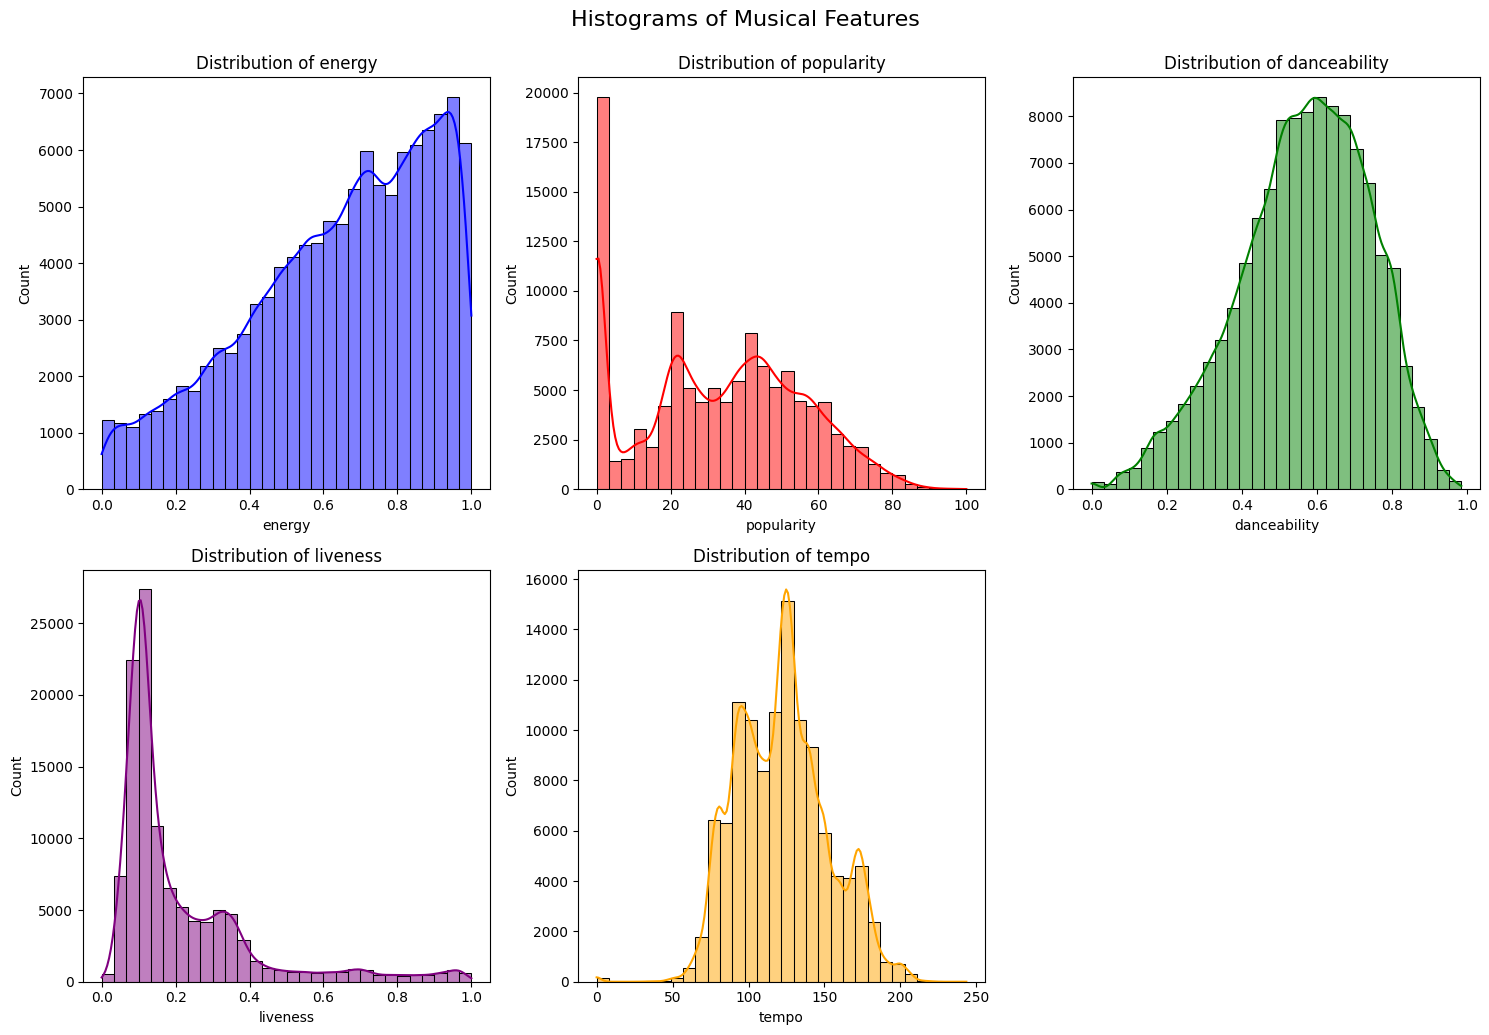

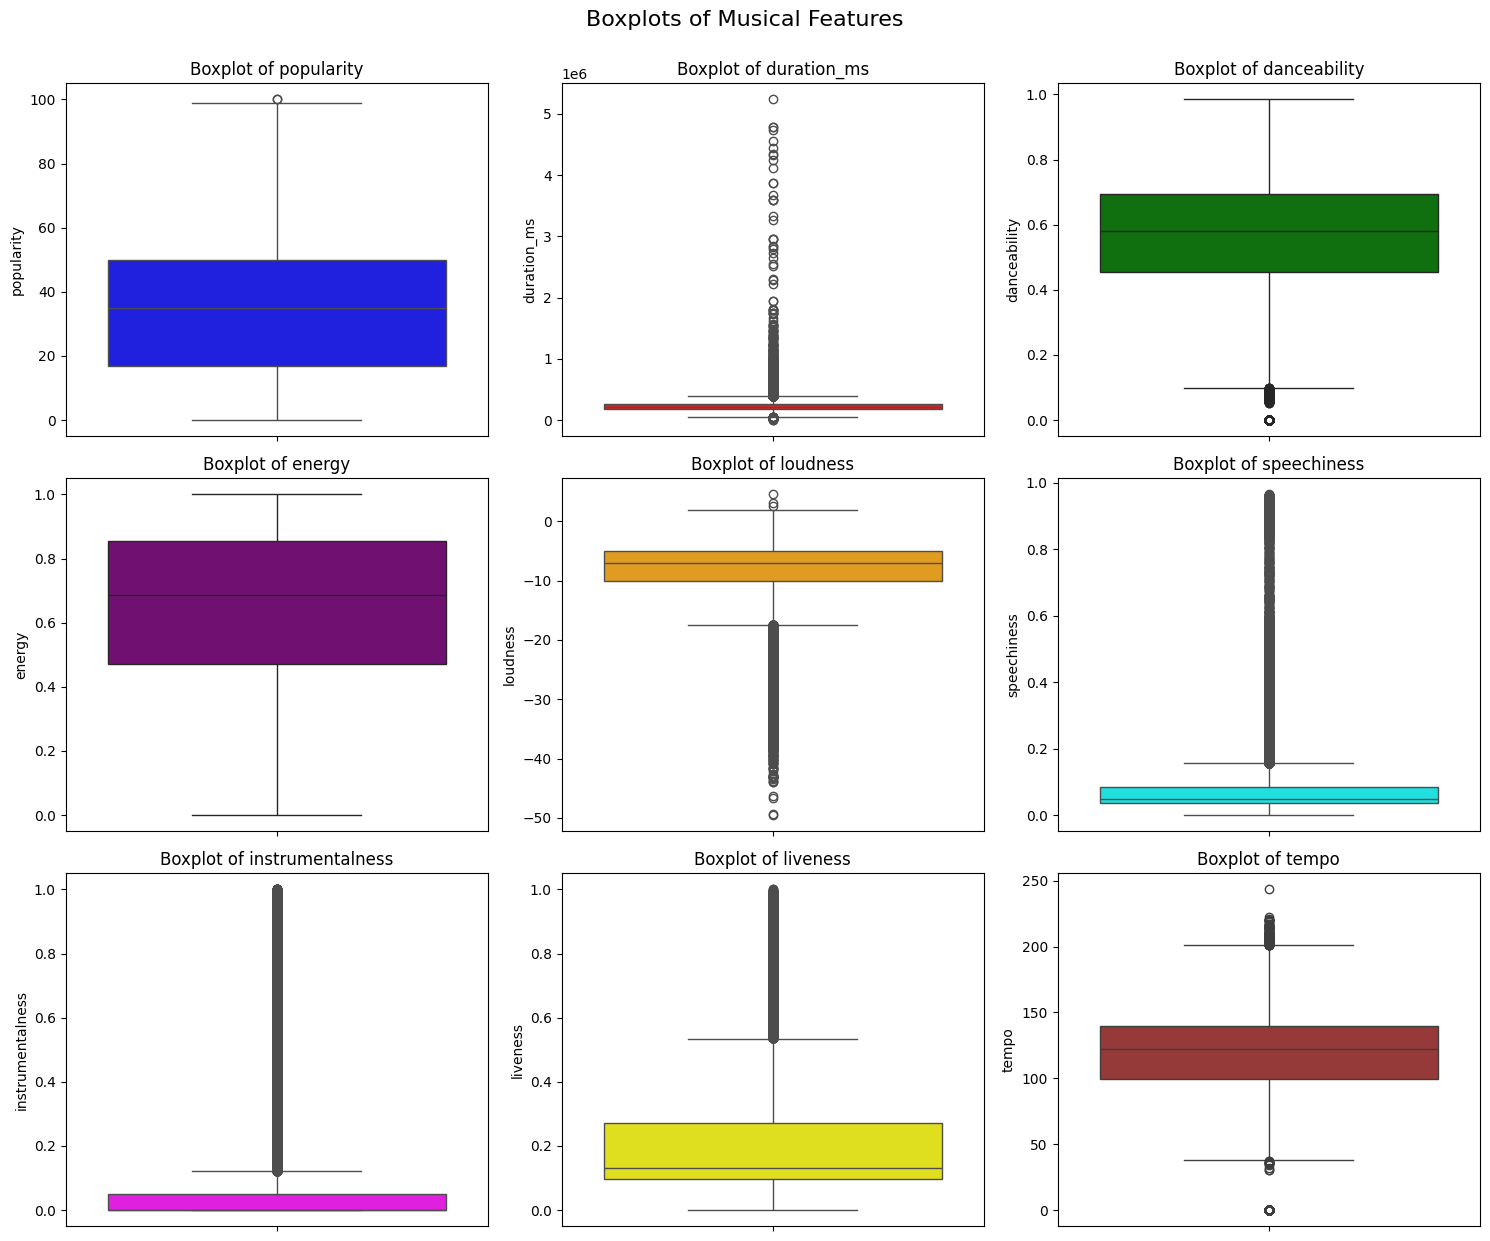

C:\Users\57302\AppData\Local\Temp\ipykernel_35132\631413996.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=spotify_df["time_signature"].to_numpy(), palette="Set2")


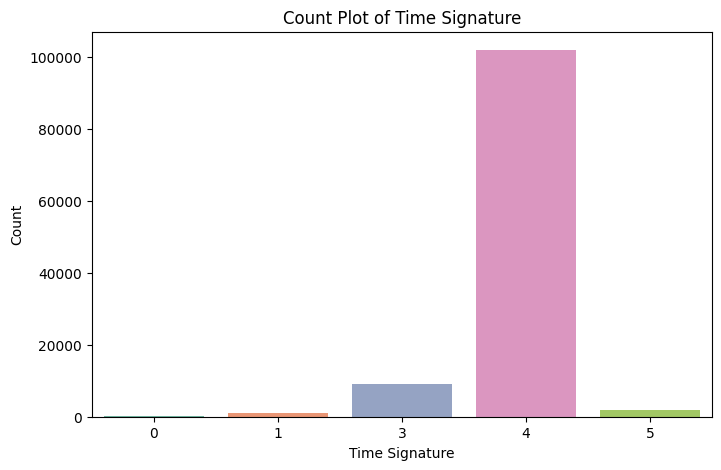

In [ ]:
histogram_columns = ["energy", "popularity", "danceability", "liveness", "tempo"]
boxplot_columns = ["popularity", "duration_ms", "danceability", "energy", "loudness",
                   "speechiness", "instrumentalness", "liveness", "tempo"]

hist_colors = ["blue", "red", "green", "purple", "orange"]
box_colors = ["blue", "red", "green", "purple", "orange", "cyan", "magenta", "yellow", "brown"]

rows, cols = 2, 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(histogram_columns):
    sns.histplot(spotify_df[col].to_numpy(), bins=30, kde=True, ax=axes[i], color=hist_colors[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(len(histogram_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histograms of Musical Features", fontsize=16, y=1.03)
plt.show()


rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(boxplot_columns):
    sns.boxplot(y=spotify_df[col].to_numpy(), ax=axes[i], color=box_colors[i % len(box_colors)], orient="v")
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(col)

for j in range(len(boxplot_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots of Musical Features", fontsize=16, y=1.03)
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x=spotify_df["time_signature"].to_numpy(), palette="Set2")
plt.title("Count Plot of Time Signature")
plt.xlabel("Time Signature")
plt.ylabel("Count")
plt.show()


#### Key Observations

From the histograms:
- **Energy** is right-skewed, with most tracks above 0.6, suggesting high-intensity production is common.
- **Popularity** is heavily skewed toward lower scores, indicating a large portion of tracks are relatively obscure; only a minority achieve high popularity.
- **Danceability** shows a near-normal distribution centered around ~0.6, indicating moderate danceability is typical.
- **Tempo** is multimodal, with peaks near 90, 120, and 140 BPM—reflecting genre-driven rhythmic preferences.
- **Liveness** is strongly skewed toward low values; most tracks are studio-recorded with little audience noise.

From the boxplots:
- **Duration (`duration_ms`)** has extreme upper outliers, possibly due to encoding errors or extended versions.
- **Speechiness**, **instrumentalness**, and **liveness** show long tails, indicating the presence of niche or stylistically distinct tracks (e.g., podcasts, instrumentals).
- **Loudness** has a consistent median but includes tracks with unusually low decibel levels (likely silences or ambient content).

The **time signature** plot confirms that the overwhelming majority of tracks use a 4/4 signature, consistent with standard Western popular music. Other time signatures are rare but present.

Overall, the dataset exhibits expected musical patterns but also highlights clear skews and outliers that should be addressed or preserved depending on analytical goals.

### Proportion of Explicit Content and Musical Mode

#### Overview

Analyzing the distribution of binary categorical features such as `explicit` and `mode` reveals patterns in content labeling and musical composition style across the dataset.

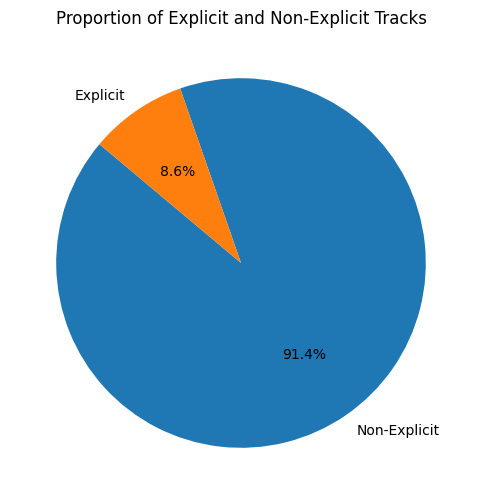

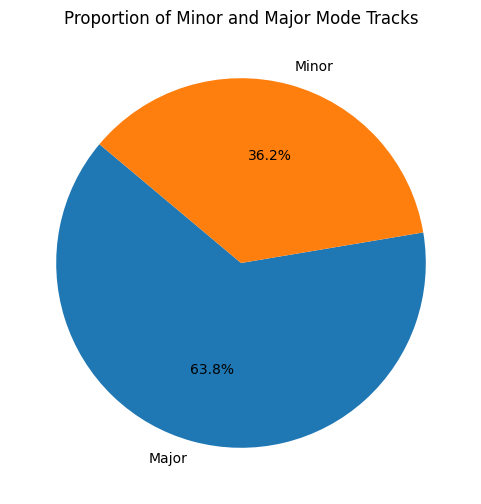

In [ ]:
explicit_counts_df = (
    spotify_df.group_by("explicit")
    .agg(pl.len().alias("counts"))
    .sort("counts", descending=True)
)

explicit_labels = ["Non-Explicit" if val == False else "Explicit" for val in explicit_counts_df["explicit"]]
explicit_sizes = explicit_counts_df["counts"]

plt.figure(figsize=(6, 6))
plt.pie(explicit_sizes, labels=explicit_labels, autopct="%1.1f%%", startangle=140)
plt.title("Proportion of Explicit and Non-Explicit Tracks")
plt.show()

mode_counts_df = (
    spotify_df.group_by("mode")
    .agg(pl.len().alias("counts"))
    .sort("counts", descending=True)
)

mode_labels = ["Minor" if val == 0 else "Major" for val in mode_counts_df["mode"]]
mode_sizes = mode_counts_df["counts"]

plt.figure(figsize=(6, 6))
plt.pie(mode_sizes, labels=mode_labels, autopct="%1.1f%%", startangle=140)
plt.title("Proportion of Minor and Major Mode Tracks")
plt.show()

#### Key Observations

- **Explicit Content**:
  - Only **8.6%** of tracks are labeled as explicit.
  - This suggests the dataset is primarily composed of general-audience content.
  - If filtered by genre, explicit content could be more concentrated in specific musical styles.

- **Musical Mode**:
  - **63.8%** of tracks are in a **major** key, while **36.2%** are in **minor**.
  - This aligns with trends in popular music, where major modes are more common due to their association with upbeat, accessible melodies.
  - The presence of over one-third in minor mode suggests substantial tonal diversity.

These proportions can be useful as filters or grouping variables in genre- or artist-level analyses.

### 3. Data Cleaning

#### Overview

We conducted a comprehensive data quality check, covering missing values, non-numeric entries in numeric columns, invalid characters in text fields, duplicate rows, and statistical outliers. This step ensures data integrity and helps define pre-processing needs before modeling or visualization.

In [ ]:

missing_values = spotify_df.null_count()

invalid_numeric = {}
for col in ["popularity", "danceability", "energy", "loudness", "speechiness",
            "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]:
    invalid_numeric[col] = spotify_df[col].cast(pl.Utf8, strict=False).str.contains(r"[^\d\.\-]").sum()

def count_invalid_text_entries(df, column):
    return df.filter(pl.col(column).str.contains(r"[^\w\s;:\-]", literal=False)).height

invalid_entries = {
    "artists": count_invalid_text_entries(spotify_df, "artists"),
    "album_name": count_invalid_text_entries(spotify_df, "album_name"),
    "track_genre": count_invalid_text_entries(spotify_df, "track_genre")
}

duplicate_rows = spotify_df.is_duplicated().sum()

outliers_count = {}
for col in ["popularity", "danceability", "energy", "loudness", "speechiness",
            "acousticness", "instrumentalness", "liveness", "valence", "tempo"]:
    Q1 = spotify_df[col].quantile(0.25)
    Q3 = spotify_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count[col] = spotify_df.filter((spotify_df[col] < lower_bound) | (spotify_df[col] > upper_bound)).height

categorical_columns = ["artists", "album_name", "track_genre"]
unusual_values = {
    col: spotify_df[col].unique().to_list()[:10] for col in categorical_columns
}

def count_strange_symbols(df, column):
    pattern = r"[^a-zA-Z0-9\s;:,\-\.\(\)áéíóúüñÁÉÍÓÚÜÑ¿¡&@#%\$=\+\*\/\[\]\{\}\^_\|~]"
    return df.filter(pl.col(column).str.contains(pattern, literal=False)).height

strange_symbol_counts = {
    col: count_strange_symbols(spotify_df, col) for col in categorical_columns
}

print("\nDATA QUALITY ANALYSIS REPORT\n")

print("Missing Values:\n", missing_values, "\n")
print("Non-Numeric Values in Numeric Columns:\n", invalid_numeric, "\n")
print("Invalid Characters in Categorical Columns:\n", invalid_entries, "\n")
print("Duplicate Rows:", duplicate_rows, "\n")
print("Outliers Detected:\n", outliers_count, "\n")
print("Sample Unique Values from Categorical Columns:")
for column, values in unusual_values.items():
    print(f"{column}: {values}")
print("\nStrange Symbols or Characters in Text Columns:\n", strange_symbol_counts, "\n")


print("\nSample Unique Values from Categorical Columns:")
for column, values in unusual_values.items():
    print(f"{column}: {values}")


DATA QUALITY ANALYSIS REPORT

Missing Values:
 shape: (1, 21)
┌─────┬──────────┬─────────┬────────────┬───┬─────────┬───────┬────────────────┬─────────────┐
│     ┆ track_id ┆ artists ┆ album_name ┆ … ┆ valence ┆ tempo ┆ time_signature ┆ track_genre │
│ --- ┆ ---      ┆ ---     ┆ ---        ┆   ┆ ---     ┆ ---   ┆ ---            ┆ ---         │
│ u32 ┆ u32      ┆ u32     ┆ u32        ┆   ┆ u32     ┆ u32   ┆ u32            ┆ u32         │
╞═════╪══════════╪═════════╪════════════╪═══╪═════════╪═══════╪════════════════╪═════════════╡
│ 0   ┆ 0        ┆ 1       ┆ 1          ┆ … ┆ 0       ┆ 0     ┆ 0              ┆ 0           │
└─────┴──────────┴─────────┴────────────┴───┴─────────┴───────┴────────────────┴─────────────┘ 

Non-Numeric Values in Numeric Columns:
 {'popularity': 0, 'danceability': 0, 'energy': 0, 'loudness': 0, 'speechiness': 0, 'acousticness': 1368, 'instrumentalness': 11323, 'liveness': 0, 'valence': 0, 'tempo': 0, 'duration_ms': 0} 

Invalid Characters in Categorical Col

#### Key Observations

- **Missing Values**: Minimal—only one missing value in `artists` and one in `album_name`. All other columns are complete.
  
- **Non-Numeric Values in Numeric Columns**: Found in `acousticness` (1,368 cases) and `instrumentalness` (11,323 cases), likely due to ingestion or formatting issues. Other numeric fields are clean.
  
- **Invalid Characters in Categorical Columns**:
  - `artists`: 8,050 cases with special/unusual characters.
  - `album_name`: 32,173 entries with irregular symbols.
  - These are likely due to encoding issues (e.g., special punctuation or non-ASCII characters).
  
- **Duplicate Rows**: None detected, confirming unique full-record entries.
  
- **Outliers**:
  - High outlier rates in `instrumentalness` (25,246), `speechiness` (13,211), `liveness` (8,642), and `loudness` (6,173).
  - Suggests stylistic diversity rather than data errors (e.g., spoken-word, ambient or instrumental content).
  - Very few outliers in `popularity` (2), indicating stability in that feature.

- **Text Anomalies**: Over 5,000 artist names and 11,000 album titles contain strange symbols—potential candidates for standardization or cleaning if used in display or matching tasks.

- **Sample Values**:
  - Genre coverage is broad and valid (e.g., `techno`, `blues`, `anime`), with no signs of malformed genre entries.
  - Artist and album fields include multi-artist collaborations and non-English names, confirming multilingual, global coverage.


### 4. Relationships Between Variables

#### Overview

To understand how musical characteristics relate to track popularity, we computed the correlation matrix, variance, and covariance across all key audio features. We also used scatterplots (`pairplot`) to visually assess linear or non-linear relationships and multicollinearity.


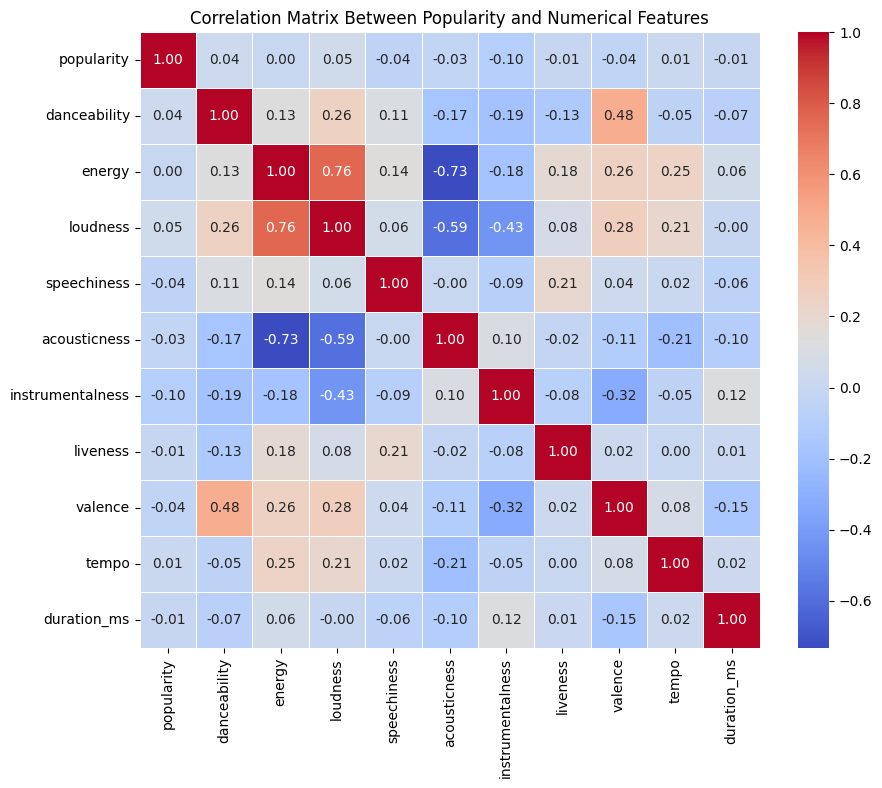

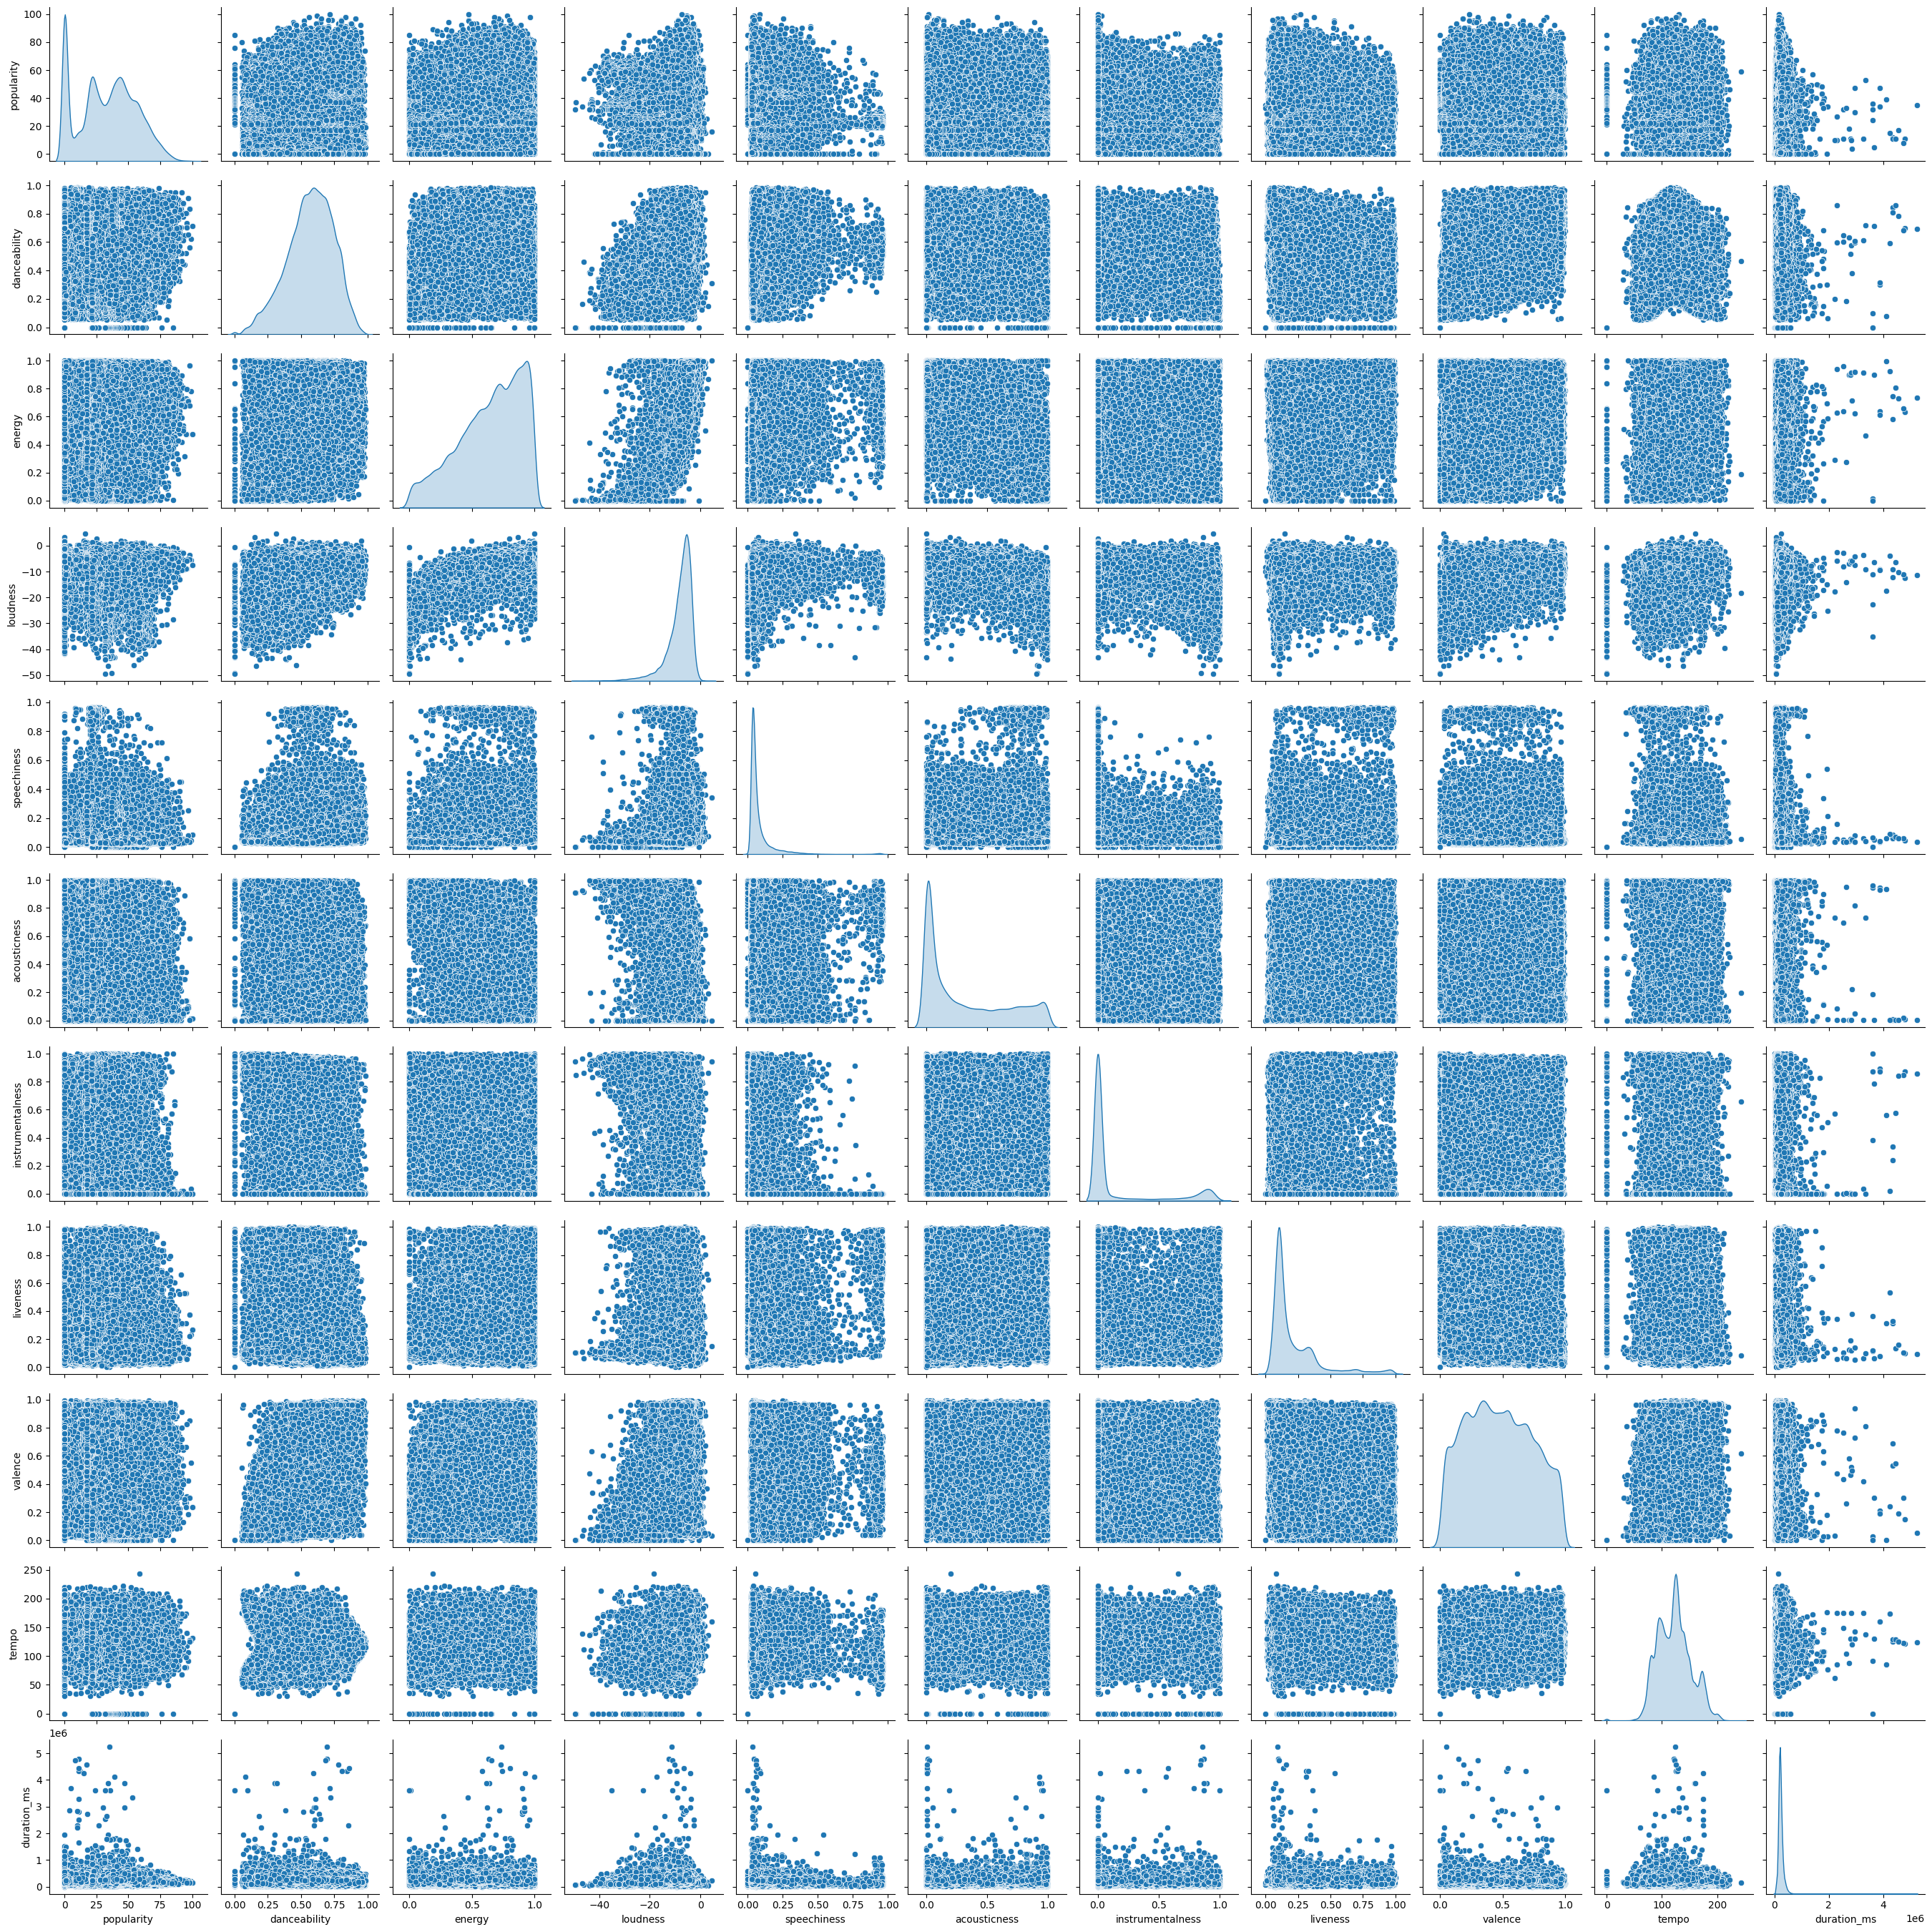

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
numerical_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"
]

spotify_pd_popularity = spotify_df.select(["popularity"] + numerical_features).to_pandas()

correlation_matrix = spotify_pd_popularity.corr()

variance = spotify_pd_popularity.var()
covariance_matrix = spotify_pd_popularity.cov()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Between Popularity and Numerical Features")
plt.show()

sns.pairplot(spotify_pd_popularity, diag_kind="kde")
plt.show()

import ace_tools as tools
variance_df = pl.DataFrame({"Feature": variance.index, "Variance": variance.values})
covariance_df = pl.from_pandas(covariance_matrix)

tools.display_dataframe_to_user(name="Variance of Features", dataframe=variance_df)
tools.display_dataframe_to_user(name="Covariance Matrix", dataframe=covariance_df)

#### Key Observations

- **Weak correlations with popularity**:
  - Most features show **low correlation** with `popularity` (|r| < 0.10).
  - Slight positive associations are observed with `loudness` (r = 0.05) and `danceability` (r = 0.04), but not strong enough to be predictive alone.
  - `instrumentalness` has a slightly **negative correlation** (r = -0.10), suggesting instrumental tracks tend to be less popular, on average.

- **Feature interdependencies**:
  - Strong positive correlation between `energy` and `loudness` (r = 0.76) is expected, as high-energy tracks tend to be louder.
  - `energy` and `acousticness` show a strong negative correlation (r = -0.73), confirming that more energetic tracks are rarely acoustic.
  - `valence` and `danceability` (r = 0.48) exhibit the most meaningful relationship among audio features, reflecting emotional and rhythmic alignment.

- **Dispersions**:
  - Variance is highest in features like `loudness`, `tempo`, and `duration_ms`, indicating a broad range of musical styles.
  - Covariance patterns reinforce known musical dependencies, especially among `energy`, `loudness`, and `acousticness`.

- **Pairplot confirmation**:
  - Visual inspection supports the statistical findings—no clear linear relationship between any single feature and popularity.
  - Some clouds suggest non-linear clusters, particularly in `tempo` and `instrumentalness`.

Overall, popularity appears to be driven by complex or external factors rather than basic audio features alone.

### Top and Bottom 10: Popularity by Artist, Album, Track, and Genre

#### Overview

To explore how popularity is distributed across the dataset, we computed the **average** and **maximum popularity** for each artist, album, track, and genre. This helps uncover which entities dominate listener attention and which remain underexposed or niche.

In [ ]:
split_artists_df = spotify_df.with_columns(pl.col("artists").str.split(";")).explode("artists")

def get_top_bottom_avg_by_category(df, category):
    category_stats = (
        df.group_by(category)
        .agg([
            pl.len().alias("count"), 
            pl.mean("popularity").alias("avg_popularity")  
        ])
        .sort(["count", "avg_popularity"], descending=[True, True])  
    )
    
    top_10 = category_stats.head(10)  
    bottom_10 = category_stats.tail(10)  
    
    return top_10, bottom_10

def get_top_bottom_max_by_category(df, category):
    category_counts = (
        df.group_by(category)
        .agg([pl.len().alias("count"), pl.max("popularity").alias("max_popularity")])  
    )
    
    top_10 = category_counts.head(10) 
    bottom_10 = category_counts.sort("max_popularity", descending=False).head(10)  
    
    return top_10, bottom_10

top_artists, bottom_artists = get_top_bottom_avg_by_category(split_artists_df, "artists")
top_albums, bottom_albums = get_top_bottom_avg_by_category(spotify_df, "album_name")

top_tracks, bottom_tracks = get_top_bottom_max_by_category(spotify_df, "track_name")
top_genres, bottom_genres = get_top_bottom_max_by_category(spotify_df, "track_genre")

print("\nTop 10 Most Popular Artists (With Count and Average Popularity):")
print(top_artists)

print("\nTop 10 Least Popular Artists (With Count and Average Popularity):")
print(bottom_artists)

print("\nTop 10 Most Popular Albums (With Count and Average Popularity):")
print(top_albums)

print("\nTop 10 Least Popular Albums (With Count and Average Popularity):")
print(bottom_albums)

print("\nTop 10 Most Popular Tracks (With Count and Max Popularity):")
print(top_tracks)

print("\nTop 10 Least Popular Tracks (With Count and Max Popularity):")
print(bottom_tracks)

print("\nTop 10 Most Popular Genres (With Count and Max Popularity):")
print(top_genres)

print("\nTop 10 Least Popular Genres (With Count and Max Popularity):")
print(bottom_genres)


Top 10 Most Popular Artists (With Count and Average Popularity):
shape: (10, 3)
┌─────────────────────────┬───────┬────────────────┐
│ artists                 ┆ count ┆ avg_popularity │
│ ---                     ┆ ---   ┆ ---            │
│ str                     ┆ u32   ┆ f64            │
╞═════════════════════════╪═══════╪════════════════╡
│ J Balvin                ┆ 510   ┆ 17.588235      │
│ Bad Bunny               ┆ 416   ┆ 29.908654      │
│ Daddy Yankee            ┆ 375   ┆ 20.504         │
│ Wolfgang Amadeus Mozart ┆ 354   ┆ 10.135593      │
│ Feid                    ┆ 348   ┆ 8.936782       │
│ George Jones            ┆ 343   ┆ 16.043732      │
│ Pritam                  ┆ 333   ┆ 53.771772      │
│ Arijit Singh            ┆ 305   ┆ 59.295082      │
│ ILLENIUM                ┆ 298   ┆ 42.0           │
│ The Beatles             ┆ 280   ┆ 60.989286      │
└─────────────────────────┴───────┴────────────────┘

Top 10 Least Popular Artists (With Count and Average Popularity):
shap

#### Key Observations

- **Artists**:
  - The most represented popular artists include **J Balvin**, **Bad Bunny**, and **The Beatles**, with average popularity reaching up to ~61.
  - The least popular artists are all represented by a **single track with 0 popularity**, suggesting fringe or unpublished entries.

- **Albums**:
  - Some albums (e.g., *"Alternative Christmas 2022"*, *"Metal"*) appear frequently but have near-zero average popularity—these may be bulk compilations or placeholder entries.
  - Albums with only one track and zero popularity dominate the least popular list, reflecting minimal exposure or archival content.

- **Tracks**:
  - Highly popular tracks like *"I Really Like You"* appear with a **max popularity of 70**, but even top entries often appear only once, suggesting a **long tail of unique tracks**.
  - Least popular tracks consistently show a **max popularity of 0**, and often include classical, foreign language, or avant-garde pieces.

- **Genres**:
  - Genres such as **synth-pop**, **singer-songwriter**, and **alternative** reach maximum popularity scores above 90, indicating strong mainstream traction.
  - Conversely, genres like **iranian**, **tango**, and **grindcore** consistently show lower maximum popularity despite having high representation (1000 tracks each), suggesting that **genre popularity is not solely a function of volume**.

These results highlight a clear **imbalance in exposure**, with a minority of artists and genres concentrating most of the popularity. Many entries exist in the dataset with zero or near-zero engagement, suggesting wide musical diversity, but also a strong skew in listener behavior.

### Relationships Between Selected Features and Explicit Content

#### Overview

We investigate potential linear relationships between specific pairs of audio features (`acousticness` vs `danceability`, `loudness` vs `energy`) and assess how explicit content varies across genres.

C:\Users\57302\AppData\Local\Temp\ipykernel_29236\3845484283.py:4: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  .pivot(values="len", index="track_genre", columns="explicit")


Explicit Track Ratio by Genre
shape: (10, 2)
┌─────────────┬────────────────┐
│ track_genre ┆ explicit_ratio │
│ ---         ┆ ---            │
│ str         ┆ f64            │
╞═════════════╪════════════════╡
│ comedy      ┆ 0.656          │
│ emo         ┆ 0.465          │
│ sad         ┆ 0.45           │
│ j-dance     ┆ 0.391          │
│ hardcore    ┆ 0.325          │
│ hip-hop     ┆ 0.319          │
│ funk        ┆ 0.304          │
│ dancehall   ┆ 0.302          │
│ metalcore   ┆ 0.291          │
│ death-metal ┆ 0.251          │
└─────────────┴────────────────┘


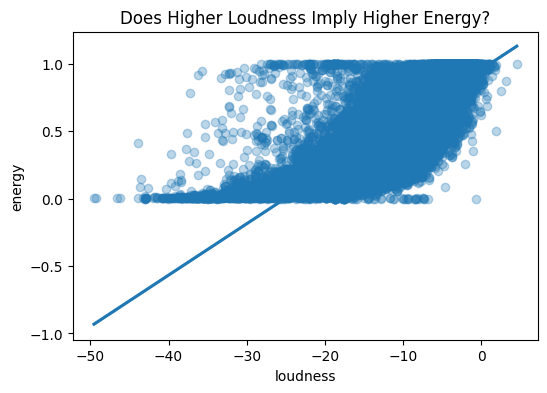

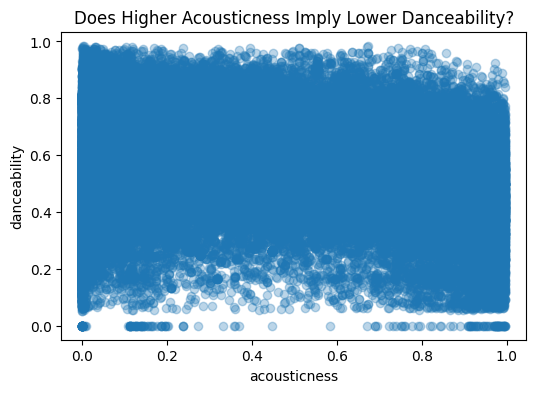

In [ ]:
genre_explicit = (
    spotify_df.group_by(["track_genre", "explicit"])
    .len()
    .pivot(values="len", index="track_genre", columns="explicit")
    .fill_null(0)
)

genre_explicit = genre_explicit.with_columns([
    (pl.col("true") / (pl.col("true") + pl.col("false"))).alias("explicit_ratio")
]).sort("explicit_ratio", descending=True)

print("Explicit Track Ratio by Genre")
print(genre_explicit.select(["track_genre", "explicit_ratio"]).head(10))

spotify_numerical = spotify_df.select(numerical_features).to_pandas()

plt.figure(figsize=(6, 4))
sns.regplot(data=spotify_numerical, x="loudness", y="energy", scatter_kws={"alpha": 0.3})
plt.title("Does Higher Loudness Imply Higher Energy?")
plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(data=spotify_numerical, x="acousticness", y="danceability", scatter_kws={"alpha": 0.3})
plt.title("Does Higher Acousticness Imply Lower Danceability?")
plt.show()

#### Key Observations

- **Loudness vs. Energy**:
  - There is a clear positive linear relationship: tracks with higher loudness levels tend to have higher energy scores.
  - This correlation supports the assumption that energy, as perceived by listeners, is closely tied to volume dynamics.

- **Acousticness vs. Danceability**:
  - There is a weak negative trend: highly acoustic tracks tend to be less danceable.
  - However, the scatter is wide—many acoustic tracks still show moderate danceability, suggesting that genre context matters.

- **Explicit Content by Genre**:
  - Genres with the highest proportions of explicit tracks are **comedy (65.6%)**, **emo**, **sad**, and **j-dance**.
  - Mainstream genres like **hip-hop (31.9%)** and **dancehall (30.2%)** also rank high.
  - These results reflect both stylistic norms (e.g., expressive or emotional lyrics) and cultural expectations within each genre.

## **5. Data Visualization**


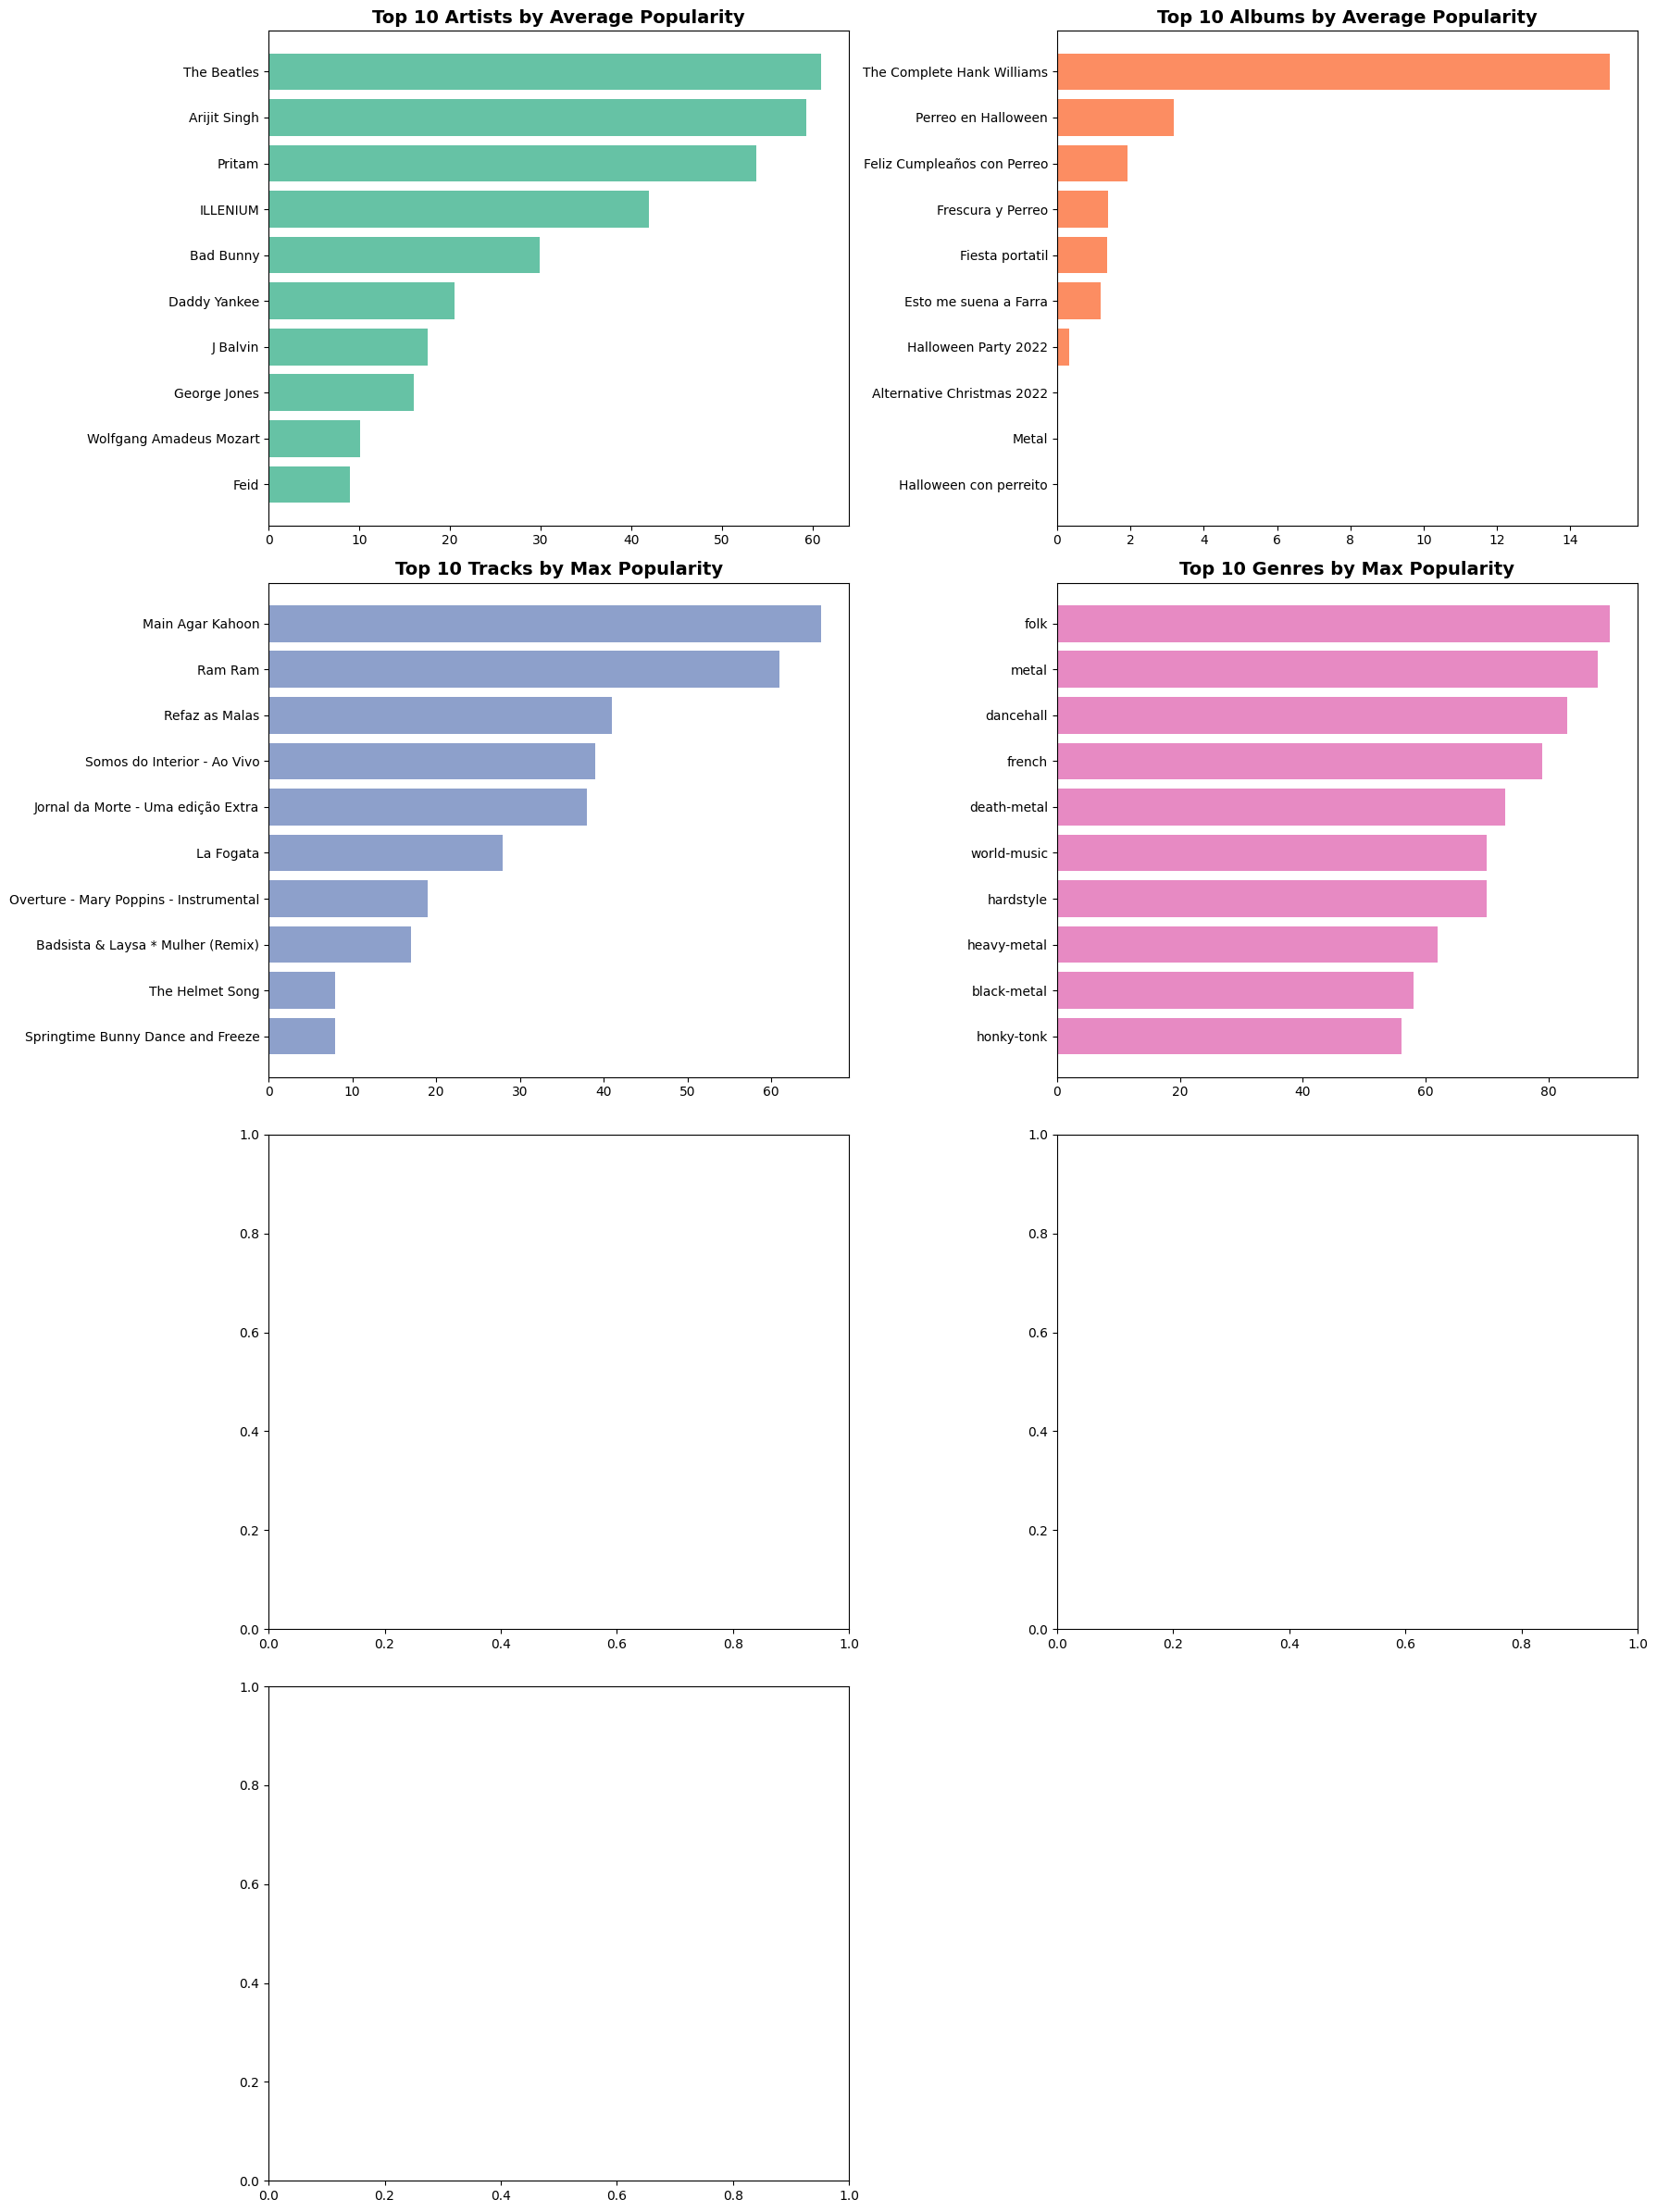

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_subplot(ax, df, x_col, y_col, title, color):
    sorted_df = df.sort_values(by=y_col, ascending=False)
    ax.barh(sorted_df[x_col], sorted_df[y_col], color=color)
    ax.set_title(title, fontsize=14, weight='bold')
    ax.invert_yaxis()

palette = sns.color_palette("Set2", 5) + sns.color_palette("Set1", 3)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24))
axes = axes.flatten()

plot_bar_subplot(axes[0], top_artists.to_pandas(), 'artists', 'avg_popularity', 'Top 10 Artists by Average Popularity', palette[0])
plot_bar_subplot(axes[1], top_albums.to_pandas(), 'album_name', 'avg_popularity', 'Top 10 Albums by Average Popularity', palette[1])
plot_bar_subplot(axes[2], top_tracks.to_pandas(), 'track_name', 'max_popularity', 'Top 10 Tracks by Max Popularity', palette[2])
plot_bar_subplot(axes[3], top_genres.to_pandas(), 'track_genre', 'max_popularity', 'Top 10 Genres by Max Popularity', palette[3])
plot_bar_subplot(axes[4], bottom_artists.to_pandas(), 'artists', 'avg_popularity', 'Bottom 10 Artists by Average Popularity', palette[4])
plot_bar_subplot(axes[5], bottom_albums.to_pandas(), 'album_name', 'avg_popularity', 'Bottom 10 Albums by Average Popularity', palette[5])
plot_bar_subplot(axes[6], bottom_tracks.to_pandas(), 'track_name', 'max_popularity', 'Least Popular Tracks by Max Popularity', palette[6])

fig.delaxes(axes[7])

plt.tight_layout()
plt.show()


## **6. Advanced Analysis**

### Introduction

This analysis aims to develop predictive models that estimate the **popularity** of songs based on both audio features and metadata. The dataset includes numerical variables (such as danceability, energy, loudness, etc.) and categorical attributes (like genre, album name, and artist). The goal is to identify which modeling approach offers the most accurate predictions of popularity.

The models will be trained and evaluated using consistent metrics and visual diagnostics to assess performance and generalization ability.


### Preprocessing Steps

Before model training, the following preprocessing steps are applied:

- Handling missing values: numerical features are filled with `-999`, and categorical variables are filled with `"missing"`.
- Separating features into numerical and categorical groups.
- Splitting the dataset into training and testing sets (80% training, 20% testing).
- Applying appropriate transformations such as scaling and encoding where required.


### Models to be Implemented

### 1. PCA + Ridge Regression

We begin with a regularized linear model. Principal Component Analysis (PCA) is applied to the scaled numerical features to reduce dimensionality and multicollinearity. Categorical variables are one-hot encoded. A Ridge regression model is then trained on the transformed dataset. This approach provides a solid linear baseline.

---

### 2. Random Forest Regressor

This tree-based ensemble method serves as a non-linear baseline. The model is trained on both scaled numerical features and one-hot encoded categorical variables. Random Forests are particularly good at handling feature interactions and reducing variance through bagging.

---

### 3. XGBoost Regressor

XGBoost is a gradient boosting algorithm known for high performance in structured data tasks. In this case, it is used with all available features, with categorical variables processed through one-hot encoding. It serves as a strong benchmark for predictive accuracy.

---

### 4. CatBoost Regressor

CatBoost is designed to natively handle categorical variables without requiring manual encoding. It is trained using all numerical features and raw categorical features such as genre, artist, and album name. CatBoost offers competitive performance and is optimized for fast and accurate gradient boosting.

---


### Evaluation Strategy

All models will be evaluated using the following metrics:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R-Squared (R²)

Additionally, visualizations will include:

- Actual vs. Predicted Popularity scatter plots
- Residual distribution plots
- Residuals vs. Predicted value plots

These plots help in diagnosing the quality of model predictions, identifying bias, and checking for homoscedasticity or heteroscedasticity in errors.

By applying and comparing these methods, we aim to identify which modeling approach best captures the underlying patterns that determine a song's popularity.


Evaluating wich model to predict popularity

PCA + Ridge

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define features
numerical_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo"
]
categorical_features = ["track_genre"]  

X = spotify_df[numerical_features + categorical_features]
y = spotify_df["popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=0.95, svd_solver='full'))
    ]), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge(alpha=1.0))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nPCA + Ridge (Simplified, track_genre only) Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (PCA + Ridge, genre only)")
plt.show()


See if a can do a randon forest to predict popularit

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler



plt.figure(figsize=(8, 5))
sns.histplot(spotify_pd_popularity["popularity"], kde=True, bins=30, color="blue")
plt.title("Distribution of Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Density")
plt.show()

popularity_variance = np.var(spotify_pd_popularity["popularity"])
print(f"Variance of Popularity: {popularity_variance}")

scaler = StandardScaler()
scaled_features = scaler.fit_transform(spotify_pd_popularity[numerical_features])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
spotify_pd_popularity["cluster"] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_pd_popularity["energy"], y=spotify_pd_popularity["loudness"], hue=spotify_pd_popularity["cluster"], palette="Set2")
plt.title("K-Means Clustering of Songs (Energy vs Loudness)")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(scaled_features, spotify_pd_popularity["popularity"])

feature_importance = rf_model.feature_importances_

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=numerical_features, palette="viridis")
plt.title("Feature Importance for Predicting Popularity (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


Random Forest


Random Forest Regressor Evaluation:
MAE: 8.42
MSE: 171.98
R²: 0.65


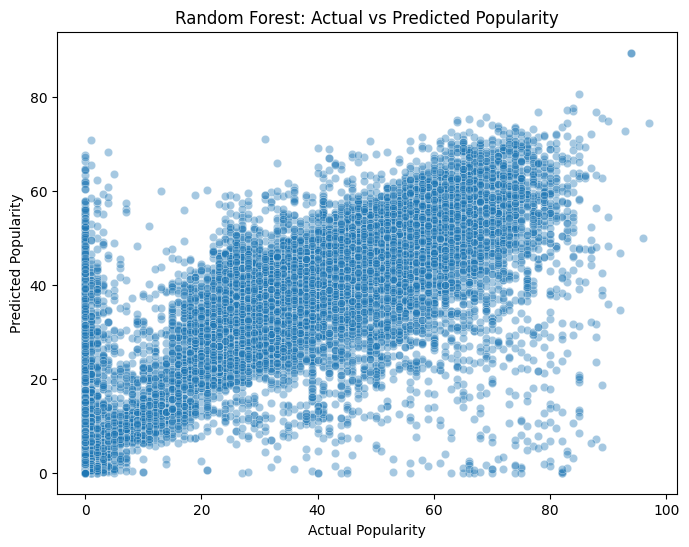

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


numerical_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo"
]
categorical_features = ["track_genre", "album_name", "artists"]

X = spotify_df[numerical_features + categorical_features]
y = spotify_df["popularity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRandom Forest Regressor Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Random Forest: Actual vs Predicted Popularity")
plt.show()


XGBoost with Categorical Features


📊 XGBoost Model Evaluation (With Genre, Album, and Artist):
✅ Mean Absolute Error: 10.74
✅ Mean Squared Error: 195.34
✅ R-Squared: 0.60


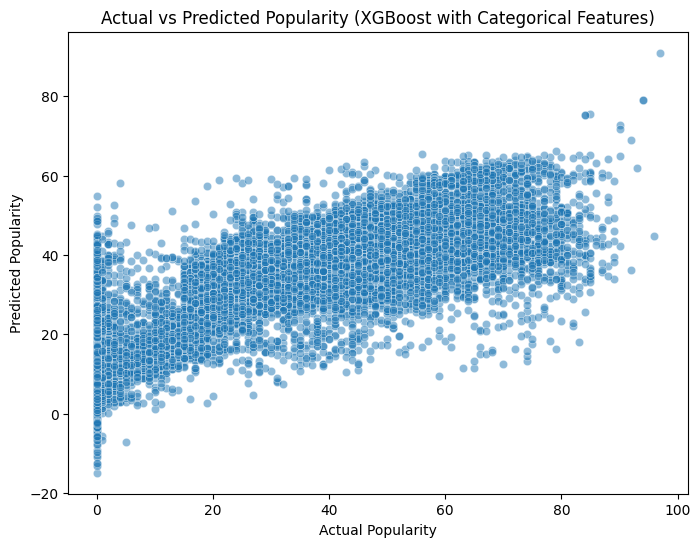

In [ ]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

spotify_df = pl.read_csv("../data/raw/spotify_dataset.csv")

numerical_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo"
]
categorical_features = ["track_genre", "album_name", "artists"]  # Include artists & albums

spotify_pd = spotify_df.select(["popularity"] + numerical_features + categorical_features).to_pandas()

X = spotify_pd[numerical_features + categorical_features]  
y = spotify_pd["popularity"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb.XGBRegressor(tree_method="gpu_hist")

xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb.XGBRegressor(objective="reg:squarederror", n_estimators=500, max_depth=10, learning_rate=0.1, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = xgb_pipeline.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Model Evaluation (With Genre, Album, and Artist):")
print(f"Mean Absolute Error: {mae_xgb:.2f}")
print(f"Mean Squared Error: {mse_xgb:.2f}")
print(f"R-Squared: {r2_xgb:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (XGBoost with Categorical Features)")
plt.show()


CatBoostRegresso

0:	learn: 20.9230174	total: 127ms	remaining: 1m 3s
100:	learn: 10.3117142	total: 18.9s	remaining: 1m 14s
200:	learn: 9.5205964	total: 43.3s	remaining: 1m 4s
300:	learn: 9.0900731	total: 1m 9s	remaining: 45.9s
400:	learn: 8.6942345	total: 1m 35s	remaining: 23.7s
499:	learn: 8.3929814	total: 2m 2s	remaining: 0us

✅ CatBoost (CPU) with Full Categorical Features Evaluation:
MAE: 6.00
MSE: 75.76
R²: 0.85


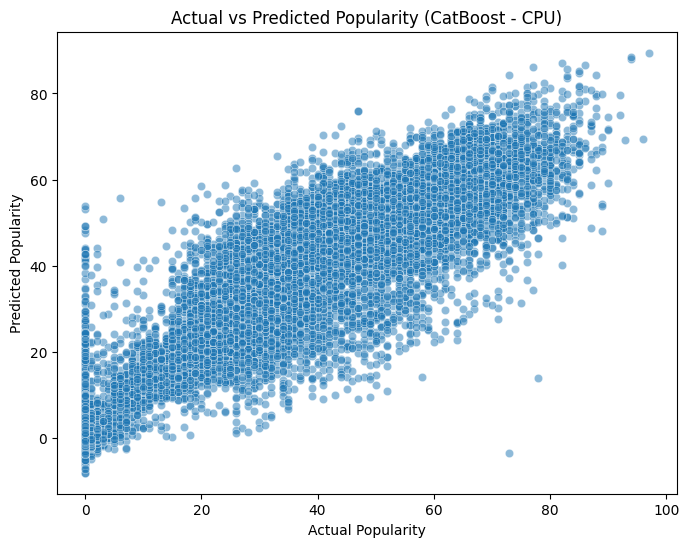

In [ ]:
import polars as pl
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

spotify_pd = spotify_df.to_pandas()

numerical_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo"
]
categorical_features = ["track_genre", "album_name", "artists"]
features = numerical_features + categorical_features

for col in numerical_features:
    spotify_pd[col] = spotify_pd[col].fillna(-999)

for col in categorical_features:
    spotify_pd[col] = spotify_pd[col].fillna("missing")

X = spotify_pd[features]
y = spotify_pd["popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=10,
    task_type="CPU",  # Usar CPU por ahora
    verbose=100
)

model.fit(X_train, y_train, cat_features=categorical_features)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ CatBoost (CPU) with Full Categorical Features Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")



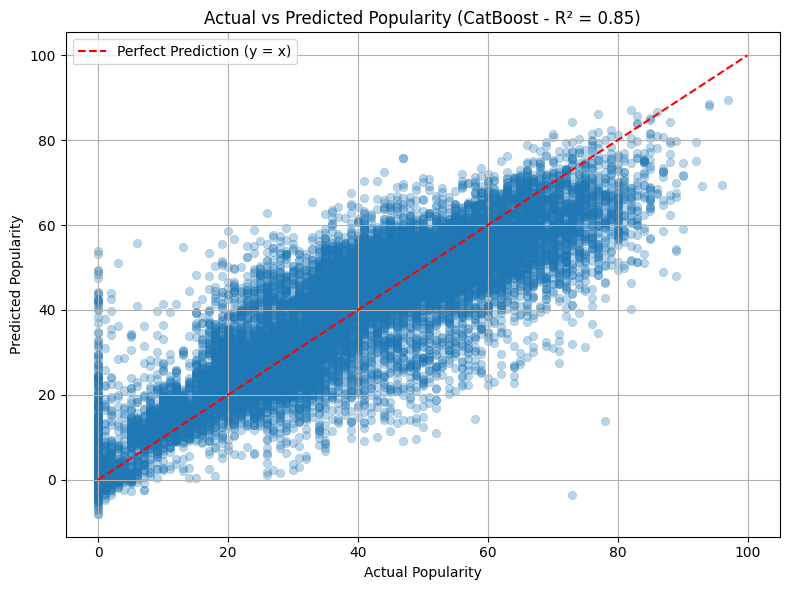

<Axes: xlabel='popularity', ylabel='Count'>

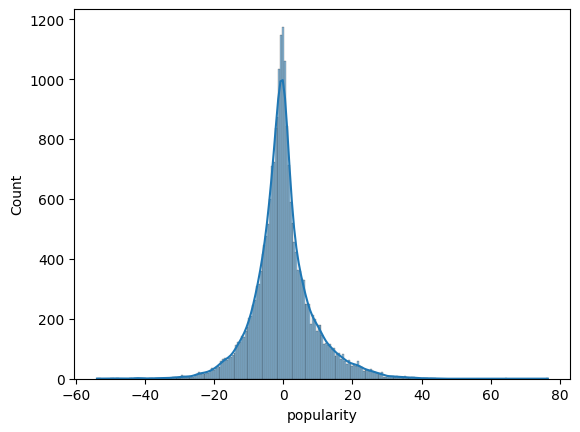

In [ ]:
import numpy as np

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, edgecolor=None)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Perfect Prediction (y = x)')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (CatBoost - R² = {:.2f})".format(r2))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

errors = y_test - y_pred
sns.histplot(errors, kde=True)


### Key Observations

- **CatBoost Regressor** clearly outperforms all other models across all evaluation metrics:
  - Lowest MAE (6.00), indicating tighter average prediction error.
  - Lowest MSE (75.76), suggesting better handling of larger errors.
  - Highest R² (0.85), explaining 85% of the variance in song popularity.
  - Its native handling of high-cardinality categorical variables (e.g., artist, album) likely contributes to its superior performance.

- **Random Forest Regressor** performs reasonably well:
  - MAE of 8.42 and R² of 0.65 indicate it captures some non-linear patterns.
  - Performs better than XGBoost, which is surprising given XGBoost's reputation—likely due to feature sparsity from one-hot encoding in the latter.

- **XGBoost Regressor**, while widely used, underperforms in this context:
  - MAE (10.74) and R² (0.60) suggest it struggles with overfitting or lacks fine-tuning.
  - One-hot encoding of categorical variables like artist and album may dilute feature importance, especially with high cardinality.

These results highlight that **model choice and feature preprocessing** have a major impact on performance—particularly when working with rich categorical metadata like music datasets. CatBoost’s ability to directly process raw categorical inputs proves to be a key advantage.


In [ ]:
spotify_df.head()

shape: (5, 21)
┌─────┬─────────────┬─────────────┬─────────────┬───┬─────────┬─────────┬─────────────┬────────────┐
│     ┆ track_id    ┆ artists     ┆ album_name  ┆ … ┆ valence ┆ tempo   ┆ time_signat ┆ track_genr │
│ --- ┆ ---         ┆ ---         ┆ ---         ┆   ┆ ---     ┆ ---     ┆ ure         ┆ e          │
│ i64 ┆ str         ┆ str         ┆ str         ┆   ┆ f64     ┆ f64     ┆ ---         ┆ ---        │
│     ┆             ┆             ┆             ┆   ┆         ┆         ┆ i64         ┆ str        │
╞═════╪═════════════╪═════════════╪═════════════╪═══╪═════════╪═════════╪═════════════╪════════════╡
│ 0   ┆ 5SuOikwiRyP ┆ Gen Hoshino ┆ Comedy      ┆ … ┆ 0.715   ┆ 87.917  ┆ 4           ┆ acoustic   │
│     ┆ MVoIQDJUgSV ┆             ┆             ┆   ┆         ┆         ┆             ┆            │
│ 1   ┆ 4qPNDBW1i3p ┆ Ben         ┆ Ghost       ┆ … ┆ 0.267   ┆ 77.489  ┆ 4           ┆ acoustic   │
│     ┆ 13qLCt0Ki3A ┆ Woodward    ┆ (Acoustic)  ┆   ┆         ┆         ┆             ┆            │
│ 2   ┆ 1iJBSr7s7jY ┆ Ingrid Mich ┆ To Begin    ┆ … ┆ 0.12    ┆ 76.332  ┆ 4           ┆ acoustic   │
│     ┆ XzM8EGcbK5b ┆ aelson;ZAYN ┆ Again       ┆   ┆         ┆         ┆             ┆            │
│ 3   ┆ 6lfxq3CG4xt ┆ Kina        ┆ Crazy Rich  ┆ … ┆ 0.143   ┆ 181.74  ┆ 3           ┆ acoustic   │
│     ┆ TiEg7opyCyx ┆ Grannis     ┆ Asians      ┆   ┆         ┆         ┆             ┆            │
│     ┆             ┆             ┆ (Original   ┆   ┆         ┆         ┆             ┆            │
│     ┆             ┆             ┆ Mo…         ┆   ┆         ┆         ┆             ┆            │
│ 4   ┆ 5vjLSffimiI ┆ Chord       ┆ Hold On     ┆ … ┆ 0.167   ┆ 119.949 ┆ 4           ┆ acoustic   │
│     ┆ P26QG5WcN2K ┆ Overstreet  ┆             ┆   ┆         ┆         ┆             ┆            │
└─────┴─────────────┴─────────────┴─────────────┴───┴─────────┴─────────┴─────────────┴────────────┘

## **8. Conclusion**

## Final Conclusion

After conducting a comprehensive exploratory data analysis (EDA) and a set of predictive modeling experiments on the Spotify dataset, several key insights and technical takeaways emerged:

### Dataset Structure and Integrity

- The dataset contains **114,000 rows** and **21 well-defined features**, including both **numerical** (e.g., tempo, loudness, danceability) and **categorical** (e.g., artist, genre, album) variables.
- The data structure is robust:
  - No duplicate rows were found.
  - Only 2 missing values (in `artists` and `album_name`) were detected.
  - All columns have defined data types and meaningful interpretations.


### Audio and Musical Feature Patterns

- **Tempo**, **energy**, and **danceability** follow genre-informed patterns:
  - Tempo is multimodal (peaks near 90, 120, and 140 BPM).
  - Energy is right-skewed; most tracks are above 0.6.
  - Danceability is normally distributed around 0.6.
- The **time_signature** is overwhelmingly 4/4, confirming consistency with Western popular music.
- **Loudness** strongly correlates with energy (r ≈ 0.76), and acousticness negatively correlates with energy (r ≈ -0.73), revealing predictable musical physics.


### Popularity and Listener Behavior

- The **popularity distribution is heavily skewed**, with the vast majority of tracks scoring below 40.
- **Popularity is weakly correlated** with audio features (|r| < 0.10). For example:
  - Loudness (r = 0.05), Danceability (r = 0.04), Instrumentalness (r = -0.10).
- This suggests **popularity is influenced more by external factors** (e.g., artist fame, playlist inclusion) than intrinsic musical characteristics.


### Entity-Level Trends

- **Artists** like *The Beatles*, *Arijit Singh*, and *Pritam* exhibit high average popularity, while lesser-known names dominate the bottom ranks.
- Many albums appear frequently but have extremely low average popularity, especially compilations or themed releases.
- **Genres** such as *synth-pop*, *singer-songwriter*, and *alternative* reach high max popularity, while *iranian*, *tango*, and *grindcore* have lower ceilings despite high representation.
- This demonstrates a **long-tail effect**: many genres and tracks exist, but only a few dominate user engagement.


### Explicit Content and Mode Distribution

- Only **8.6%** of tracks are labeled as explicit—most music in the dataset is general-audience.
- Explicit content is concentrated in genres like *comedy*, *emo*, and *hip-hop*.
- **63.8%** of tracks are in **major** key, and **36.2%** in **minor**, suggesting a tonal preference for brighter, more accessible music.


### Data Quality Observations

- Outliers are especially present in fields like:
  - `instrumentalness` (25k+ extreme values),
  - `speechiness` and `liveness`, reflecting non-standard or niche content (e.g., podcasts, ambient).
- Many artist and album names include **special characters or formatting inconsistencies**, likely due to metadata ingestion issues.


### Predictive Modeling Insights

- **CatBoost Regressor** significantly outperforms all others:
  - MAE: 6.00, MSE: 75.76, R²: **0.85**
  - Native handling of high-cardinality categorical variables (artist, album, genre) gives it a substantial advantage.
- **Random Forest** performed moderately well (R²: 0.65), better than **XGBoost** (R²: 0.60), which struggled due to sparse one-hot encoded features.
- These results demonstrate the **critical role of feature preprocessing and model selection** when working with complex categorical metadata.


### Overall Summary

The EDA confirms that Spotify track data is rich, clean, and highly expressive, but also highlights the challenges of working with real-world music data:

- **Popularity is a multifactorial phenomenon** that cannot be explained by audio features alone.
- **Modeling success depends heavily on how metadata is represented and processed**.
- Tools like **CatBoost**, which respect the native structure of categorical features, are well-suited to this domain.

These insights provide a solid foundation for building music recommendation systems, trend analysis tools, or artist discovery engines in future stages of the project.
